In [135]:
library(readxl)
library(repr)
options(repr.plot.width = 14, repr.plot.height = 10)
dataset <- read_excel("USDTRY_Historical_Data.xlsx", skip = 3,
                   col_types = c("date","numeric"), col_names = c("Dates","Lastprice"))
head(dataset)
summary(dataset)

Dates,Lastprice
1997-10-20,0.1808
1997-10-21,0.1813
1997-10-22,0.1820
1997-10-23,0.1818
1997-10-24,0.1826
1997-10-27,0.1828


     Dates                       Lastprice     
 Min.   :1997-10-20 00:00:00   Min.   :0.1808  
 1st Qu.:2003-02-07 00:00:00   1st Qu.:1.3212  
 Median :2008-05-14 00:00:00   Median :1.5123  
 Mean   :2008-05-12 22:52:28   Mean   :1.7428  
 3rd Qu.:2013-08-15 00:00:00   3rd Qu.:1.9491  
 Max.   :2018-11-20 00:00:00   Max.   :6.8838  

In [136]:

MonthlyRisk <- function(xs, STARTstring, STARTmatrix) {

   Weekly <- split(xs$Lastprice, format(as.Date(xs$Dates,tryFormat=c("%d.%m.%Y")),"%Y-%W"))
   WeeklyLog <- sapply(Weekly, function(x){log(x[length(x)]/x[1])})
   newdataset <- ts(WeeklyLog, frequency = 52, start = STARTmatrix)
   dates <- format(as.Date(STARTstring, tryFormat=c("%Y/%m/%d"))+7*(0:length(newdataset)),"%Y-%m")
   risk <- ts(sapply(split(newdataset,dates),var),freq=12,start=STARTmatrix)
   return(risk)
}

In [159]:
data9701 <- dataset[dataset$Dates >= "1997-10-20" & dataset$Dates <= "2001-12-31",]
data0112 <- dataset[dataset$Dates >= "2002-01-01" & dataset$Dates <= "2011-12-31",]
data1217 <- dataset[dataset$Dates >= "2012-01-01" & dataset$Dates <= "2017-12-31",]

In [160]:
Part1 <- MonthlyRisk(data9701, "1997/10/20", c(1997,42))
Part2 <- MonthlyRisk(data0112, "2002/01/01", c(2002,01))
Part3 <- MonthlyRisk(data1217, "2012/01/01", c(2012,01))

Warning message in split.default(newdataset, dates):
"veri uzunluğu bölünmüş değişkenin bir katı değil"Warning message in split.default(newdataset, dates):
"veri uzunluğu bölünmüş değişkenin bir katı değil"Warning message in split.default(newdataset, dates):
"veri uzunluğu bölünmüş değişkenin bir katı değil"

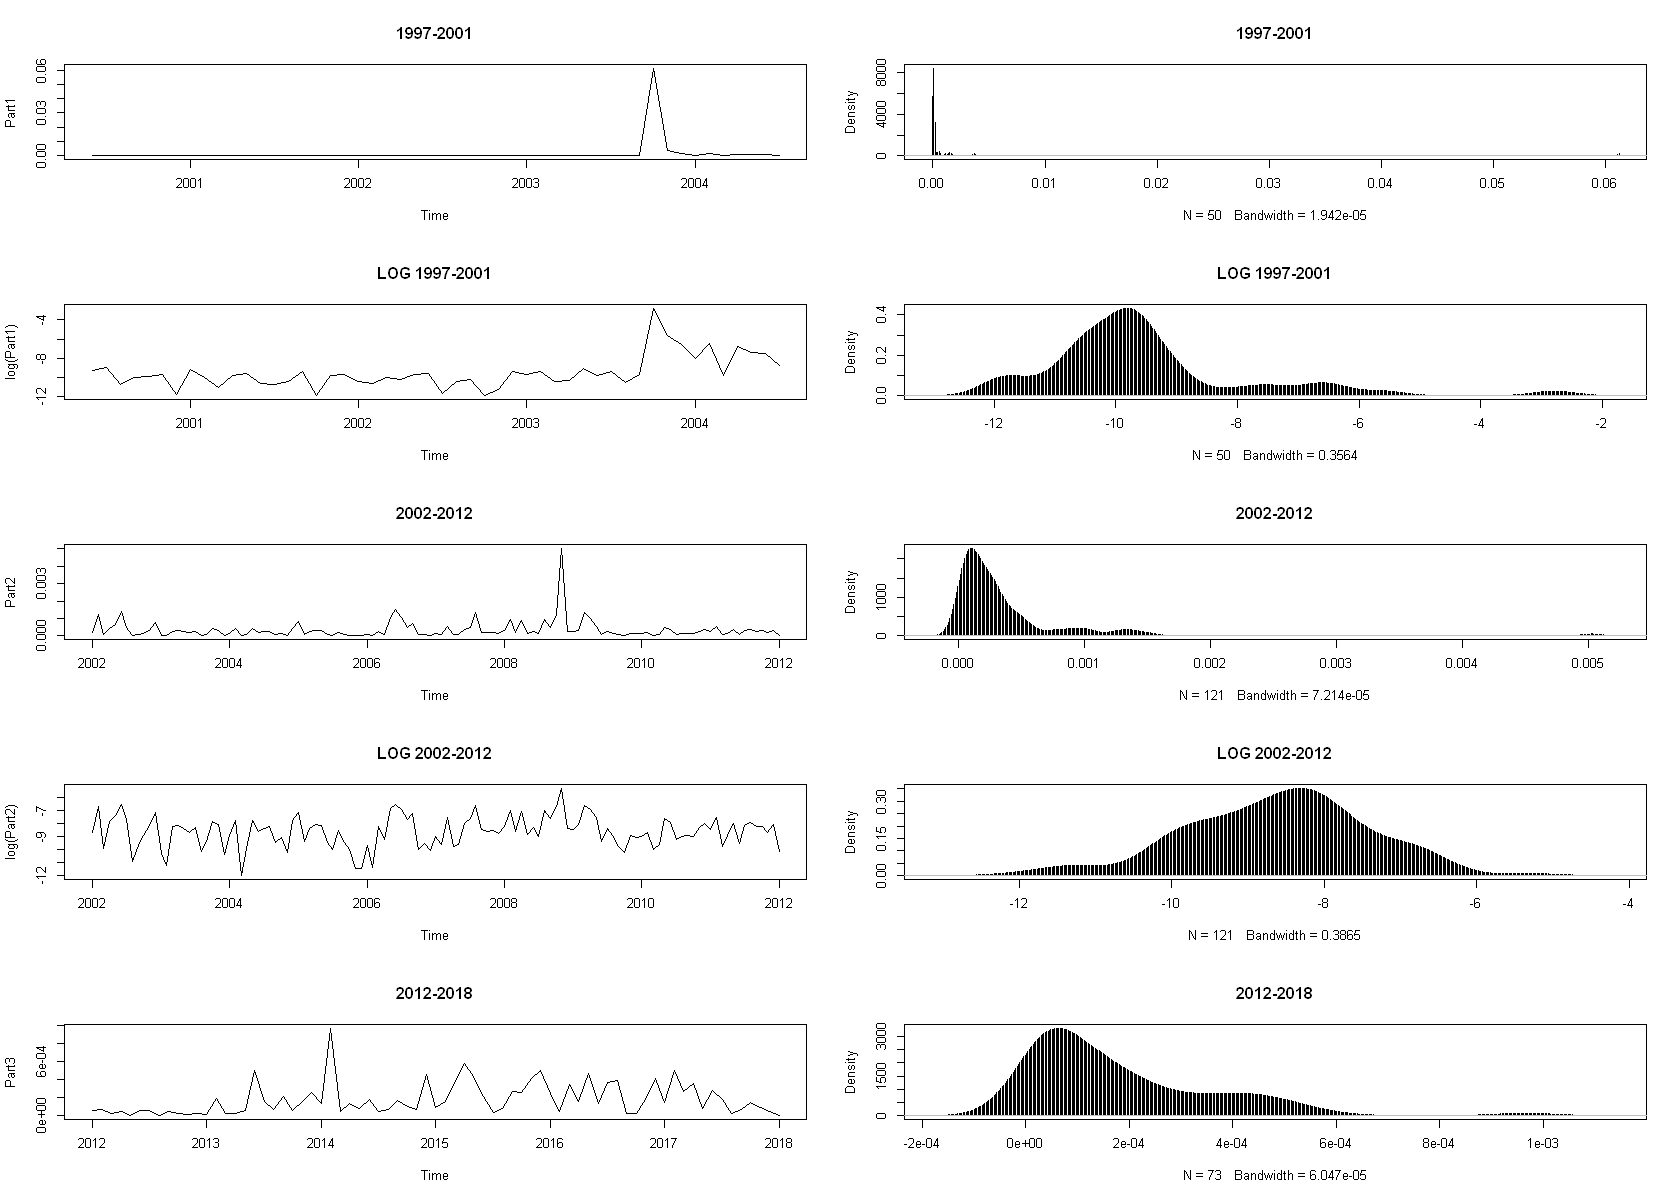

In [168]:
Part1 <- na.omit(Part1)
Part2 <- na.omit(Part2)
Part3 <- na.omit(Part3)
par(mfrow=c(5,2))
plot(Part1, type = "l", main = "1997-2001")
plot(density(Part1), type = "h", main = "1997-2001")
plot(log(Part1), type = "l", main = "LOG 1997-2001")
plot(density(log(Part1)), type = "h", main = "LOG 1997-2001")
plot(Part2, type = "l", main = "2002-2012")
plot(density(Part2), type = "h", main = "2002-2012")
plot(log(Part2), type = "l", main = "LOG 2002-2012")
plot(density(log(Part2)), type = "h", main = "LOG 2002-2012")
plot(Part3, type = "l", main = "2012-2018")
plot(density(Part3), type = "h", main = "2012-2018")

### To test is a sample follows a normal distribution, use shapiro test

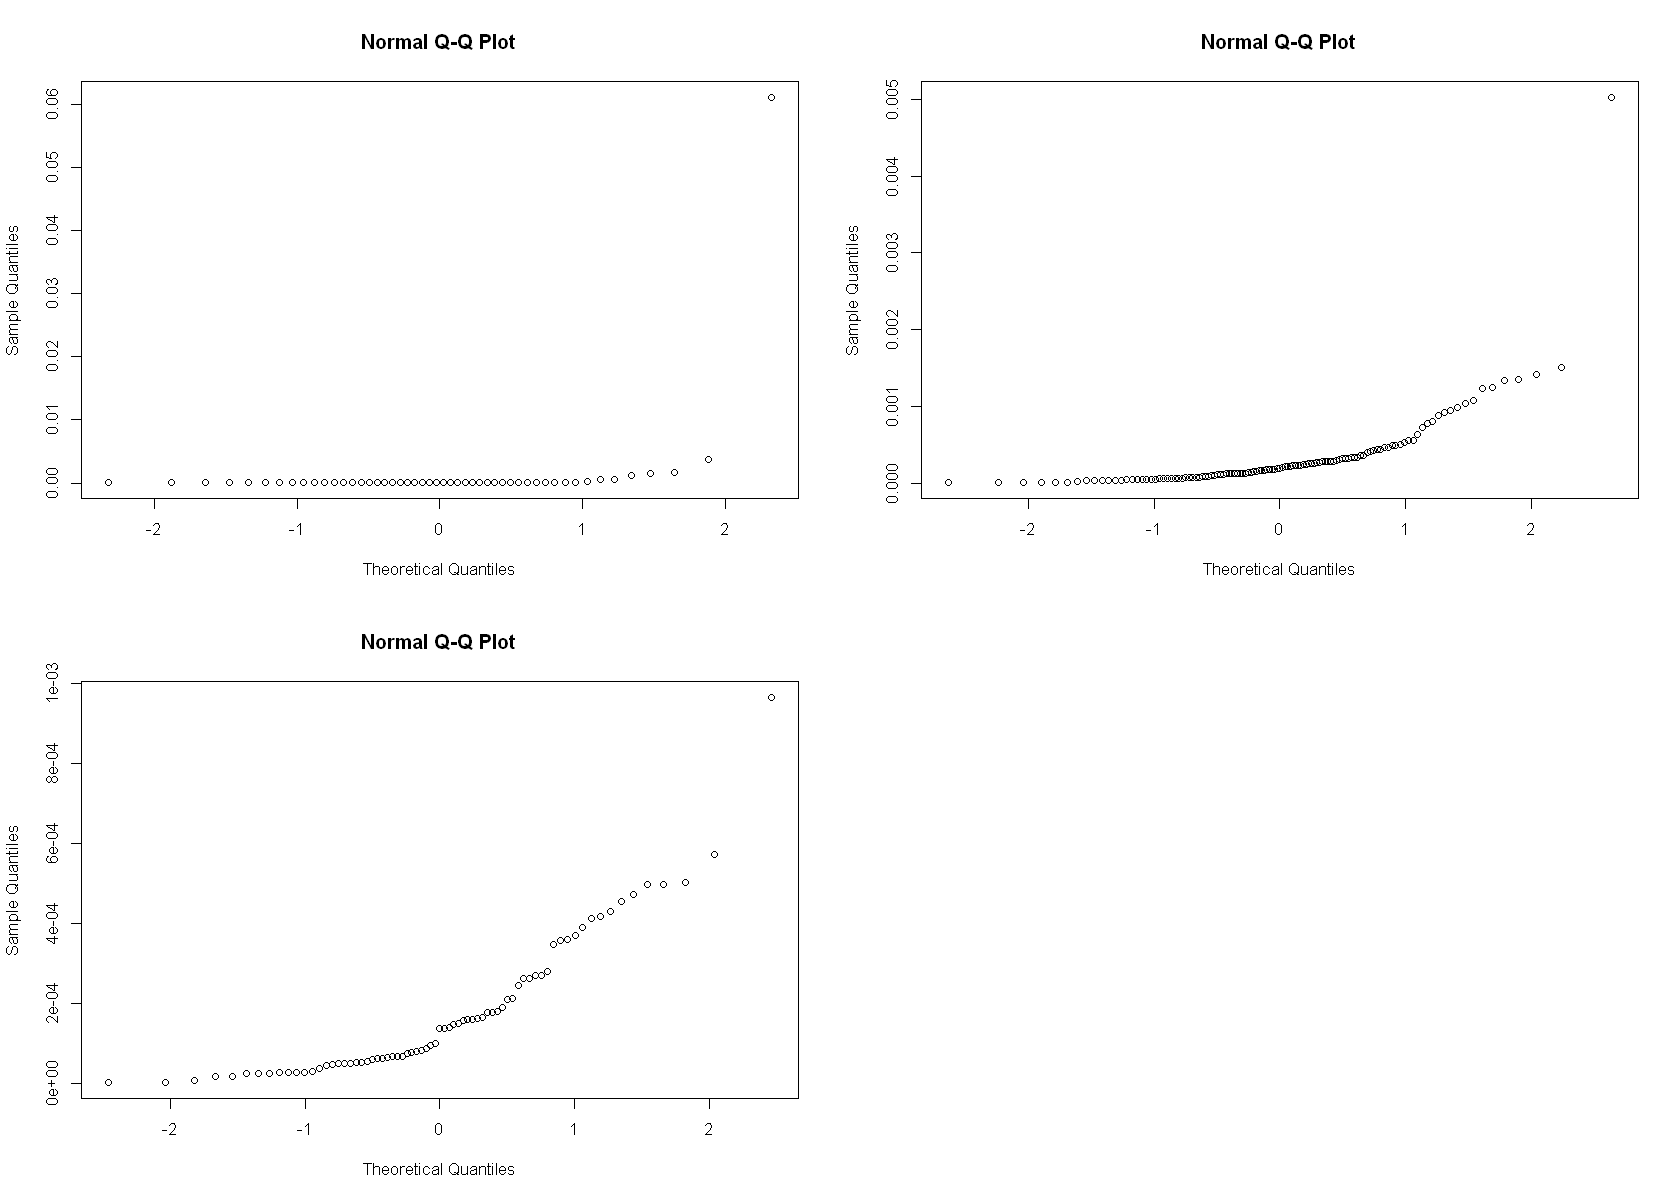

In [174]:
par(mfrow=c(2,2))
qqnorm(Part1)
qqnorm(Part2)
qqnorm(Part3)

In [163]:
shapiro.test(Part1)
shapiro.test(Part2)
shapiro.test(Part3)


	Shapiro-Wilk normality test

data:  Part1
W = 0.1522, p-value = 1.918e-15



	Shapiro-Wilk normality test

data:  Part2
W = 0.50932, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  Part3
W = 0.82101, p-value = 5.643e-08


For Part1, The null hypothesis is that the sample is normally distributed. Since p-value is greater than the significane level of 0.05, we can not reject the null hypothesis. So, The sample is confirmed to a normal distribution.

For Part2 and Part3, Since p-value is less than 0.05, we can reject the null hypothesis, we accept the alternative hypothesis. That is our sample is not from normal distribution.

### Fisher's F test can used to check if two samples have same variances.

In [164]:
var.test(Part1,Part2)
var.test(Part1,Part3)
var.test(Part2,Part3)


	F test to compare two variances

data:  Part1 and Part2
F = 250.65, num df = 49, denom df = 120, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 159.7504 412.4774
sample estimates:
ratio of variances 
          250.6494 



	F test to compare two variances

data:  Part1 and Part3
F = 2354.6, num df = 49, denom df = 72, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1420.147 4005.947
sample estimates:
ratio of variances 
           2354.58 



	F test to compare two variances

data:  Part2 and Part3
F = 9.3939, num df = 120, denom df = 72, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  6.129921 14.084466
sample estimates:
ratio of variances 
          9.393919 


Since p-values in all case are less than 0.05, we can reject the null hpothesis, so we accept the alternative test that the variances are not same.

### Willcoxon Signed Rank Test which is non-parametric method
To test the mean of a sample when normal distribution is not assumed
Since we dont have the assumptions of t-test, we will use the Willcoxon Signed Rank Test for non parametric. 

In [165]:
wilcox.test(Part1, Part2)
wilcox.test(Part1, Part3)
wilcox.test(Part2, Part3)


	Wilcoxon rank sum test with continuity correction

data:  Part1 and Part2
W = 1575, p-value = 8.554e-07
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  Part1 and Part3
W = 1309, p-value = 0.007946
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  Part2 and Part3
W = 5497, p-value = 0.004363
alternative hypothesis: true location shift is not equal to 0


The p-value of the test is approximately 0, which is less than the significance level alpha = 0.05. We can conclude that the average of part1 is significantly different from the average of part2  with a p-value = $2.2*10^{-16}$ .